![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

from livelossplot import PlotLossesKeras
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


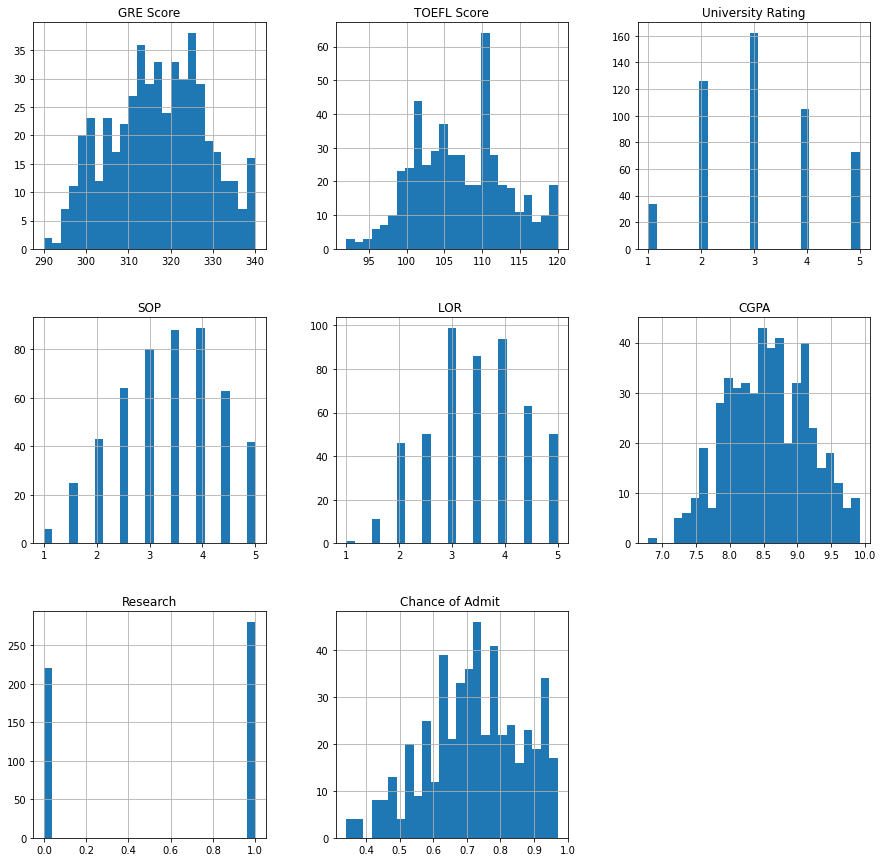

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [7]:
xTrain.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,316.805714,107.414286,3.128571,3.411429,3.507143,8.597057,0.565714
std,11.278296,6.066709,1.149579,0.993178,0.895279,0.591639,0.496372
min,290.000000,92.000000,1.000000,1.000000,1.500000,7.210000,0.000000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.142500,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.060000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [8]:
xTest.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,315.693333,106.673333,3.08000,3.286667,3.430000,8.528333,0.546667
std,11.333828,6.105885,1.13232,0.983670,0.993317,0.633911,0.499485
min,290.000000,93.000000,1.00000,1.000000,1.000000,6.800000,0.000000
25%,307.000000,102.000000,2.00000,2.500000,2.500000,8.097500,0.000000
50%,316.000000,107.000000,3.00000,3.500000,3.500000,8.550000,1.000000
75%,323.000000,111.000000,4.00000,4.000000,4.000000,9.020000,1.000000
max,340.000000,120.000000,5.00000,5.000000,5.000000,9.910000,1.000000


In [9]:
yTrain.describe()

count    350.000000
mean       0.726486
std        0.138876
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance of Admit , dtype: float64

In [10]:
keras.__version__

'2.8.0'

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [11]:
# Escalar datos de entrada
scaler = StandardScaler()
xTrain_escalado = scaler.fit_transform(xTrain)
xTest_escalado = scaler.transform(xTest)

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, 'output variables')

7 input variables
1 output variables


#### Optimizador: SGD / Función de pérdida: MSE

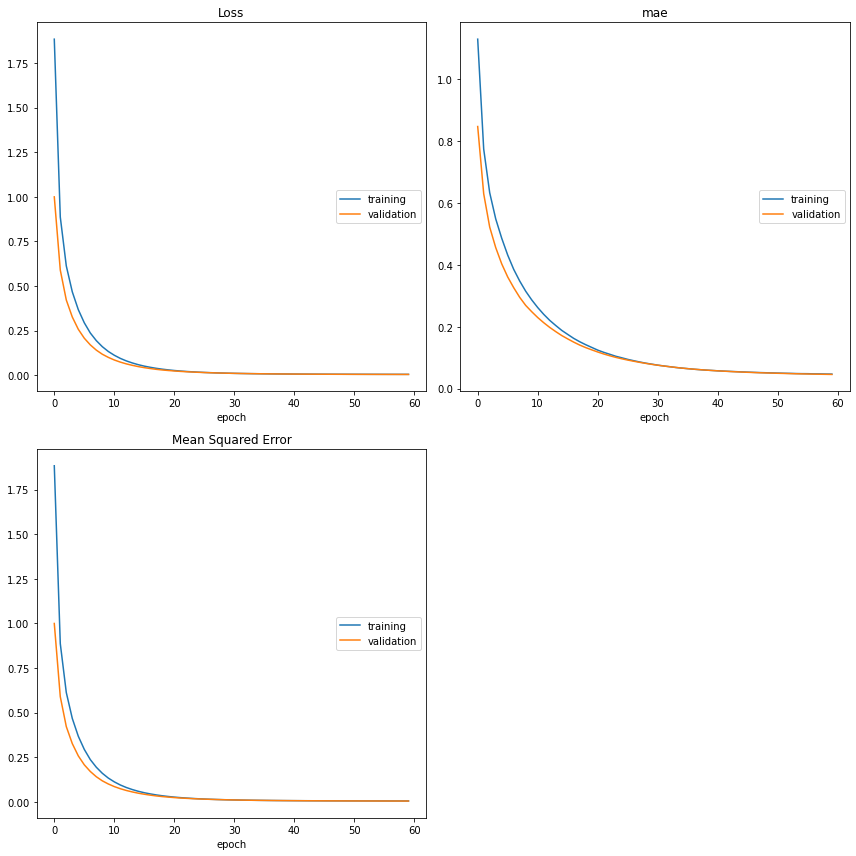

Loss
	training         	 (min:    0.004, max:    1.883, cur:    0.004)
	validation       	 (min:    0.004, max:    0.999, cur:    0.004)
mae
	training         	 (min:    0.047, max:    1.130, cur:    0.047)
	validation       	 (min:    0.046, max:    0.848, cur:    0.046)
Mean Squared Error
	training         	 (min:    0.004, max:    1.883, cur:    0.004)
	validation       	 (min:    0.004, max:    0.999, cur:    0.004)

11/11 [==============================] - 3s 259ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0470 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0459


In [12]:
### Red neuronal de 1 capa con métrica MSE - Mean Squared Error

keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_1MSE = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_1MSE.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model_1MSE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_1MSE.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_1MSE.fit(xTrain_escalado, yTrain, 
          verbose=1, 
          epochs=60, 
          validation_data=(xTest_escalado, yTest),
          callbacks=[PlotLossesKeras(), early_stop])

# Registrar MSE y MAE para comparación
MSE_sgd_mse = historia_fit.history['val_mse'][-1]
MAE_sgd_mse = historia_fit.history['val_mae'][-1]
Epoch_sgd_mse = len(historia_fit.history['val_mse'])

#### Optimizador: SGD / Función de pérdida: MAE

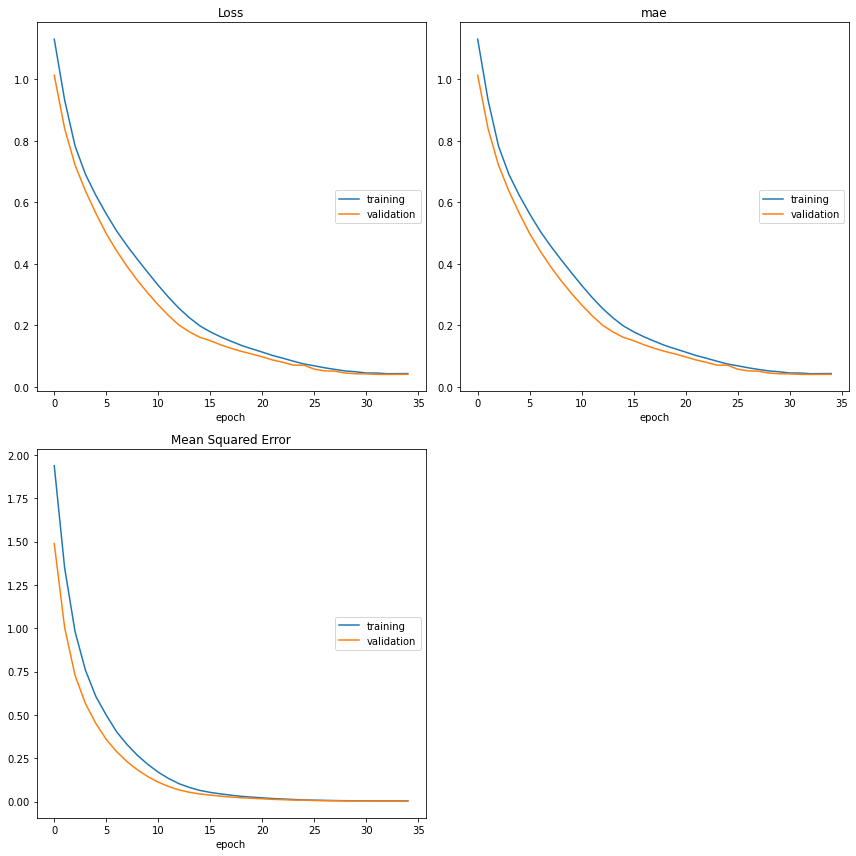

Loss
	training         	 (min:    0.043, max:    1.131, cur:    0.044)
	validation       	 (min:    0.041, max:    1.014, cur:    0.041)
mae
	training         	 (min:    0.043, max:    1.131, cur:    0.044)
	validation       	 (min:    0.041, max:    1.014, cur:    0.041)
Mean Squared Error
	training         	 (min:    0.004, max:    1.937, cur:    0.004)
	validation       	 (min:    0.003, max:    1.488, cur:    0.003)
11/11 [==============================] - 1s 126ms/step - loss: 0.0437 - mse: 0.0040 - mae: 0.0437 - val_loss: 0.0411 - val_mse: 0.0034 - val_mae: 0.0411
Epoch 35: early stopping


In [13]:
### Red neuronal de 1 capa con métrica MAE - Mean Absolute Error

keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_1MAE = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_1MAE.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model_1MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_1MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_1MAE.fit(xTrain_escalado, yTrain, 
          verbose=1, 
          epochs=60, 
          validation_data=(xTest_escalado, yTest),
          callbacks=[PlotLossesKeras(), early_stop])

# Registrar MSE y MAE para comparación
MSE_sgd_mae = historia_fit.history['val_mse'][-1]
MAE_sgd_mae = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae = len(historia_fit.history['val_mse'])

#### Optimizador: Adam / Función de pérdida: MSE

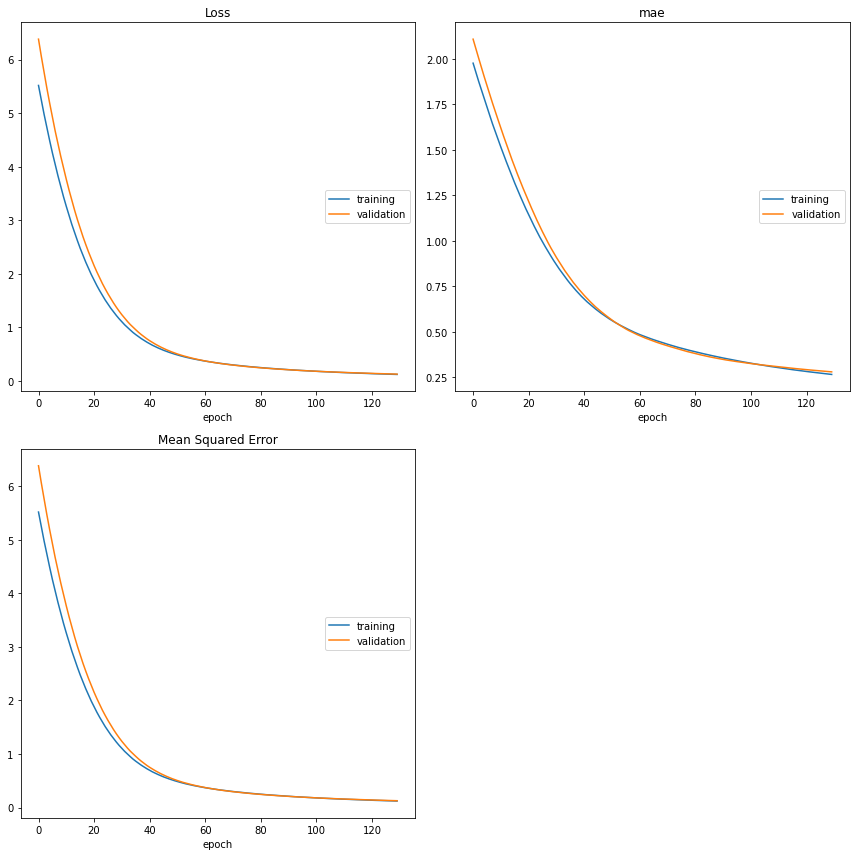

Loss
	training         	 (min:    0.123, max:    5.517, cur:    0.123)
	validation       	 (min:    0.129, max:    6.381, cur:    0.129)
mae
	training         	 (min:    0.266, max:    1.977, cur:    0.266)
	validation       	 (min:    0.280, max:    2.109, cur:    0.280)
Mean Squared Error
	training         	 (min:    0.123, max:    5.517, cur:    0.123)
	validation       	 (min:    0.129, max:    6.381, cur:    0.129)

11/11 [==============================] - 3s 344ms/step - loss: 0.1232 - mse: 0.1232 - mae: 0.2663 - val_loss: 0.1291 - val_mse: 0.1291 - val_mae: 0.2805


In [14]:
### Red neuronal de 1 capa con métrica MSE - Mean Squared Error

keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_1MSE = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_1MSE.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model_1MSE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_1MSE.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_1MSE.fit(xTrain_escalado, yTrain, 
          verbose=1, 
          epochs=130, 
          validation_data=(xTest_escalado, yTest),
          callbacks=[PlotLossesKeras(), early_stop])

# Registrar MSE y MAE para comparación
MSE_adam_mse = historia_fit.history['val_mse'][-1]
MAE_adam_mse = historia_fit.history['val_mae'][-1]
Epoch_adam_mse = len(historia_fit.history['val_mse'])

#### Optimizador: Adam / Función de pérdida: MAE

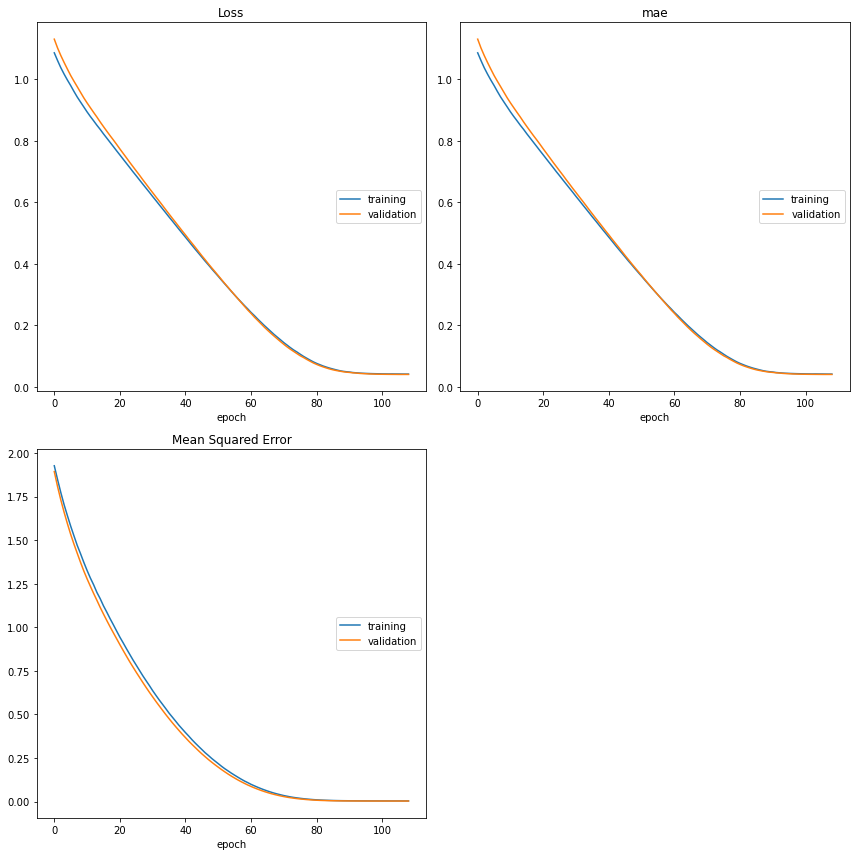

Loss
	training         	 (min:    0.042, max:    1.087, cur:    0.042)
	validation       	 (min:    0.041, max:    1.131, cur:    0.041)
mae
	training         	 (min:    0.042, max:    1.087, cur:    0.042)
	validation       	 (min:    0.041, max:    1.131, cur:    0.041)
Mean Squared Error
	training         	 (min:    0.004, max:    1.928, cur:    0.004)
	validation       	 (min:    0.003, max:    1.894, cur:    0.003)
11/11 [==============================] - 2s 237ms/step - loss: 0.0420 - mse: 0.0039 - mae: 0.0420 - val_loss: 0.0408 - val_mse: 0.0033 - val_mae: 0.0408
Epoch 109: early stopping


In [15]:
### Red neuronal de 1 capa con métrica MAE - Mean Absolute Error

keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_1MAE = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_1MAE.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model_1MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_1MAE.compile(optimizer='Adam', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_1MAE.fit(xTrain_escalado, yTrain, 
          verbose=1, 
          epochs=130, 
          validation_data=(xTest_escalado, yTest),
          callbacks=[PlotLossesKeras(), early_stop])

# Registrar MSE y MAE para comparación
MSE_adam_mae = historia_fit.history['val_mse'][-1]
MAE_adam_mae = historia_fit.history['val_mae'][-1]
Epoch_adam_mae = len(historia_fit.history['val_mse'])

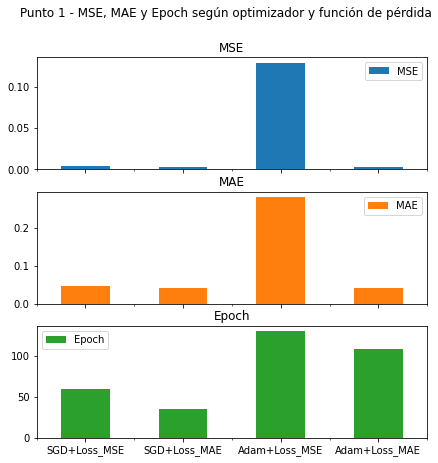

In [16]:
# Resultados Punto 1

Punto_1 = pd.DataFrame(data={'MSE': [MSE_sgd_mse, MSE_sgd_mae, MSE_adam_mse, MSE_adam_mae],
                             'MAE': [MAE_sgd_mse, MAE_sgd_mae, MAE_adam_mse, MAE_adam_mae],
                             'Epoch': [Epoch_sgd_mse, Epoch_sgd_mae, Epoch_adam_mse, Epoch_adam_mae]},
                             index=['SGD+Loss_MSE','SGD+Loss_MAE','Adam+Loss_MSE','Adam+Loss_MAE'])

## Graficar resultados 
ax = Punto_1[['MSE','MAE', 'Epoch']].plot.bar(rot=0, subplots=True, figsize=(7,7),title="Punto 1 - MSE, MAE y Epoch según optimizador y función de pérdida")

Se utilizaron dos tipos de optimizadores:
- El optimizador _SGD_ es un optimizador con tasa de aprendizaje fija.
- El optimizador _Adam_ que tiene una tasa de aprendizaje que adaptativa.

También, se utilizaron dos tipos de función de pérdida: MSE (error medio cuadrático) y MAE (error medio absoluto).

Como resultado, las redes neuronales ajustadas con el optimizador SGD tuvieron los menores valores de MSE y MAE. Adicionalmente, requirieron menor cantidad de iteraciones (Epoch) para llegar al modelo final. Para este punto, se selecciona el modelo con optimizador SGD y función de pérdida MAE (SGD+Loss_MAE).

In [17]:
# Resultado Punto 1
Punto_1_MSE = MSE_sgd_mae
Punto_1_MAE = MAE_sgd_mae
Punto_1_Epoch = Epoch_sgd_mae

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Optimizador: SGD / Función de pérdida: MAE / 60 neuronas en capa oculta

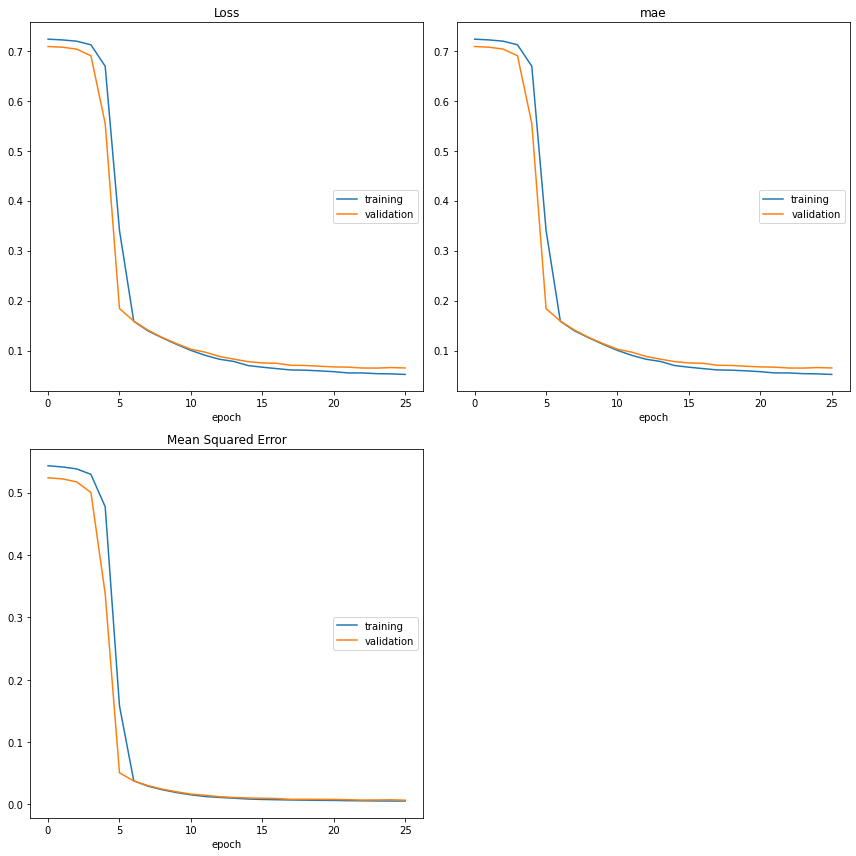

Loss
	training         	 (min:    0.052, max:    0.723, cur:    0.052)
	validation       	 (min:    0.065, max:    0.709, cur:    0.065)
mae
	training         	 (min:    0.052, max:    0.723, cur:    0.052)
	validation       	 (min:    0.065, max:    0.709, cur:    0.065)
Mean Squared Error
	training         	 (min:    0.005, max:    0.543, cur:    0.005)
	validation       	 (min:    0.007, max:    0.524, cur:    0.007)
11/11 [==============================] - 1s 146ms/step - loss: 0.0521 - mse: 0.0055 - mae: 0.0521 - val_loss: 0.0651 - val_mse: 0.0069 - val_mae: 0.0651
Epoch 26: early stopping


In [18]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(60, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(60,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_60 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_60 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_60 = len(historia_fit.history['val_mse'])

#### Optimizador: SGD / Función de pérdida: MAE / 120 neuronas en capa oculta

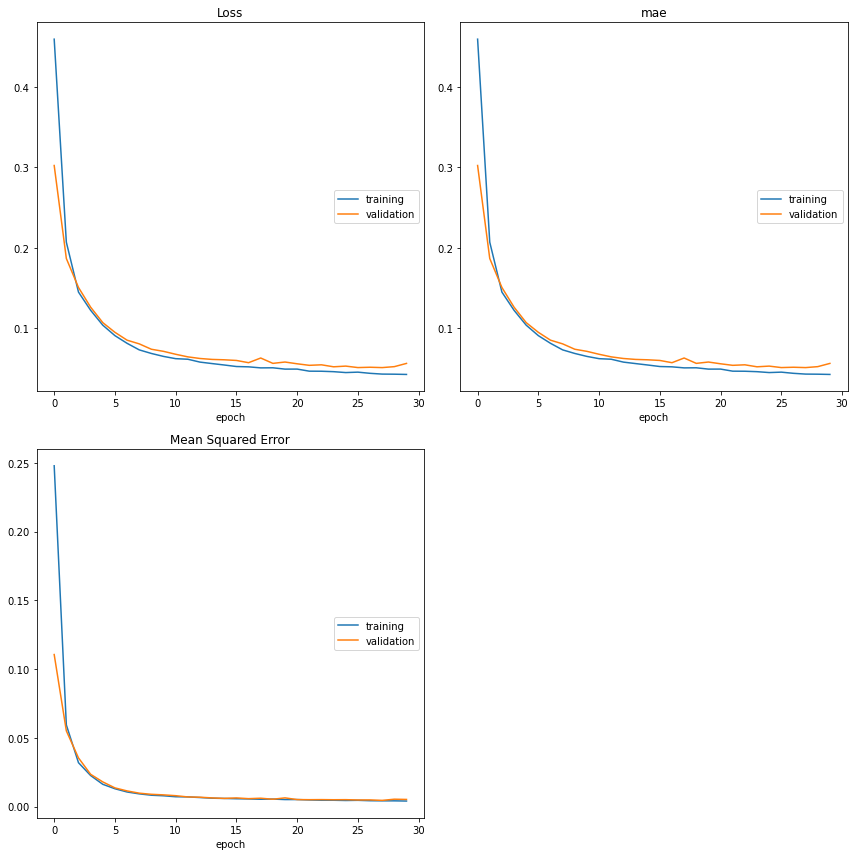

Loss
	training         	 (min:    0.043, max:    0.460, cur:    0.043)
	validation       	 (min:    0.051, max:    0.302, cur:    0.056)
mae
	training         	 (min:    0.043, max:    0.460, cur:    0.043)
	validation       	 (min:    0.051, max:    0.302, cur:    0.056)
Mean Squared Error
	training         	 (min:    0.004, max:    0.248, cur:    0.004)
	validation       	 (min:    0.005, max:    0.111, cur:    0.005)
11/11 [==============================] - 4s 406ms/step - loss: 0.0427 - mse: 0.0041 - mae: 0.0427 - val_loss: 0.0564 - val_mse: 0.0052 - val_mae: 0.0564
Epoch 30: early stopping


In [19]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(120, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(120,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_120 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_120 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_120 = len(historia_fit.history['val_mse'])

#### Optimizador: SGD / Función de pérdida: MAE / 180 neuronas en capa oculta

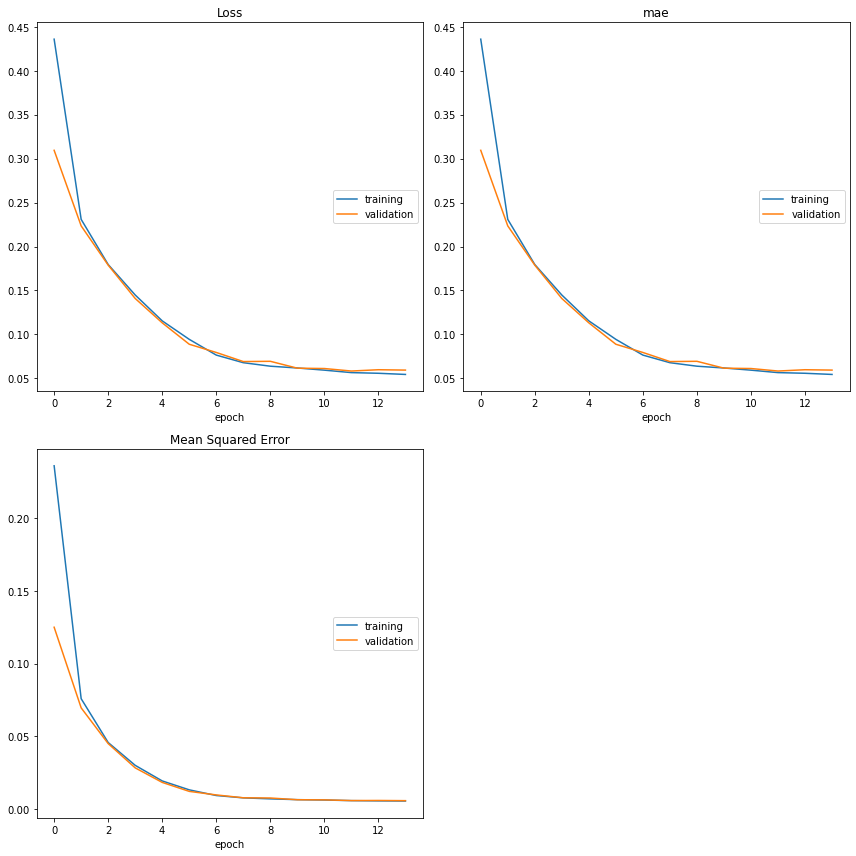

Loss
	training         	 (min:    0.054, max:    0.436, cur:    0.054)
	validation       	 (min:    0.058, max:    0.309, cur:    0.059)
mae
	training         	 (min:    0.054, max:    0.436, cur:    0.054)
	validation       	 (min:    0.058, max:    0.309, cur:    0.059)
Mean Squared Error
	training         	 (min:    0.005, max:    0.236, cur:    0.005)
	validation       	 (min:    0.006, max:    0.125, cur:    0.006)
11/11 [==============================] - 4s 378ms/step - loss: 0.0544 - mse: 0.0054 - mae: 0.0544 - val_loss: 0.0594 - val_mse: 0.0056 - val_mae: 0.0594
Epoch 14: early stopping


In [20]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(180, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(180,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_180 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_180 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_180 = len(historia_fit.history['val_mse'])

#### Optimizador: SGD / Función de pérdida: MAE / 240 neuronas en capa oculta

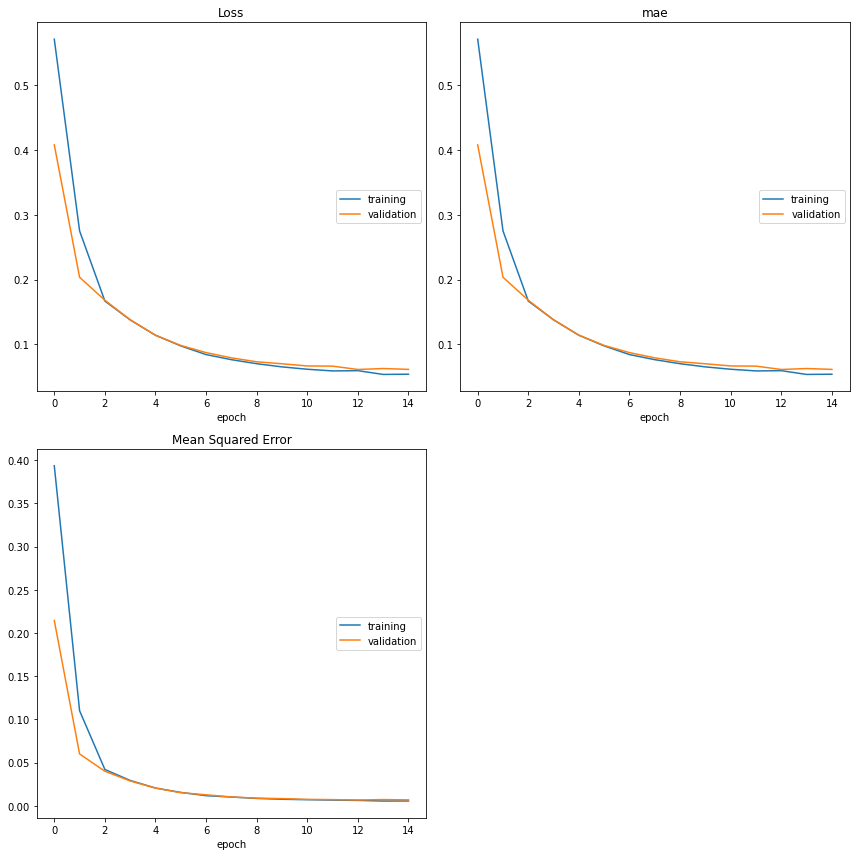

Loss
	training         	 (min:    0.053, max:    0.571, cur:    0.054)
	validation       	 (min:    0.061, max:    0.408, cur:    0.061)
mae
	training         	 (min:    0.053, max:    0.571, cur:    0.054)
	validation       	 (min:    0.061, max:    0.408, cur:    0.061)
Mean Squared Error
	training         	 (min:    0.005, max:    0.394, cur:    0.006)
	validation       	 (min:    0.007, max:    0.214, cur:    0.007)
11/11 [==============================] - 2s 213ms/step - loss: 0.0538 - mse: 0.0056 - mae: 0.0538 - val_loss: 0.0613 - val_mse: 0.0068 - val_mae: 0.0613
Epoch 15: early stopping


In [23]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(240, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(240,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_240 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_240 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_240 = len(historia_fit.history['val_mse'])

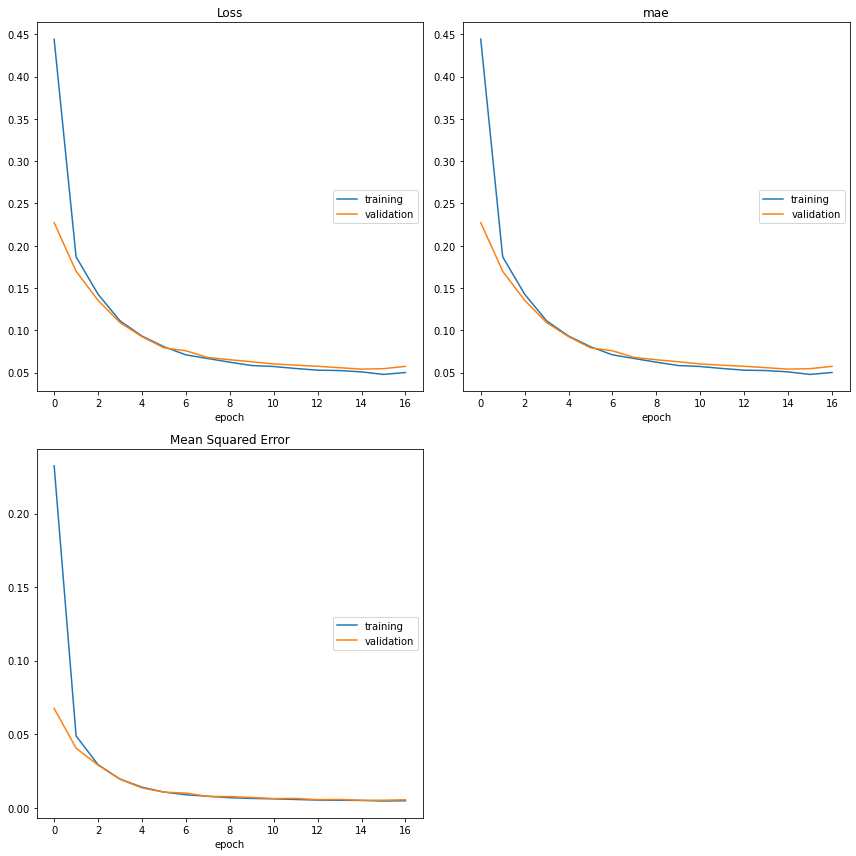

Loss
	training         	 (min:    0.048, max:    0.444, cur:    0.050)
	validation       	 (min:    0.054, max:    0.227, cur:    0.057)
mae
	training         	 (min:    0.048, max:    0.444, cur:    0.050)
	validation       	 (min:    0.054, max:    0.227, cur:    0.057)
Mean Squared Error
	training         	 (min:    0.005, max:    0.233, cur:    0.005)
	validation       	 (min:    0.005, max:    0.068, cur:    0.005)
11/11 [==============================] - 2s 233ms/step - loss: 0.0502 - mse: 0.0047 - mae: 0.0502 - val_loss: 0.0574 - val_mse: 0.0054 - val_mae: 0.0574
Epoch 17: early stopping


In [24]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(480, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(480,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_480 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_480 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_480 = len(historia_fit.history['val_mse'])

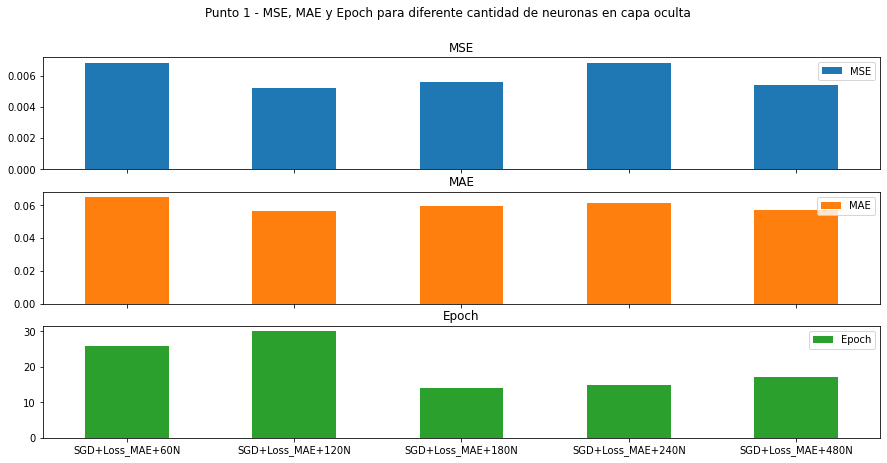

In [38]:
# Resultados Punto 2

Punto_2 = pd.DataFrame(data={'MSE': [MSE_sgd_mae_60, MSE_sgd_mae_120, MSE_sgd_mae_180, MSE_sgd_mae_240, MSE_sgd_mae_480],
                             'MAE': [MAE_sgd_mae_60, MAE_sgd_mae_120, MAE_sgd_mae_180, MAE_sgd_mae_240, MAE_sgd_mae_480],
                             'Epoch': [Epoch_sgd_mae_60, Epoch_sgd_mae_120, Epoch_sgd_mae_180, Epoch_sgd_mae_240, Epoch_sgd_mae_480]},
                             index=['SGD+Loss_MAE+60N','SGD+Loss_MAE+120N','SGD+Loss_MAE+180N','SGD+Loss_MAE+240N','SGD+Loss_MAE+480N'])

## Graficar resultados 
ax = Punto_2[['MSE','MAE', 'Epoch']].plot.bar(rot=0, subplots=True, figsize=(15,7),title="Punto 1 - MSE, MAE y Epoch para diferente cantidad de neuronas en capa oculta")

Las métricas MSE y MAE disminuyen a medida que la capa intermedia tiene más neuronas, sin embargo, tienden a estabilizarse cuando el número de neuronas es muy grande. Como resultado de este punto, se selecciona al modelo obtenido con 240 neuronas en la capa oculta. Previamente, en el punto 1, se había seleccionado utilizar el optimizador SGD y función de pérdida MAE.

In [26]:
# Resultado Punto 2
Punto_2_MSE = MSE_sgd_mae_240
Punto_2_MAE = MAE_sgd_mae_240
Punto_2_Epoch = Epoch_sgd_mae_240

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

#### Optimizador: SGD / Función de pérdida: MAE / 240 neuronas en tres capas ocultas / Dropout: 25% entre capas ocultas 1-2

In [27]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_3aMAE = Sequential()
n_neuronas = 240

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_3aMAE.add(Dense(n_neuronas, input_shape=(dims,),activation='relu'))
model_3aMAE.add(Dense(n_neuronas,activation='relu'))
model_3aMAE.add(Dropout(0.25))
model_3aMAE.add(Dense(n_neuronas,activation='relu'))
model_3aMAE.add(Dense(n_neuronas,activation='relu'))
model_3aMAE.add(Dense(output_var))
model_3aMAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_3aMAE.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               1920      
                                                                 
 dense_1 (Dense)             (None, 240)               57840     
                                                                 
 dropout (Dropout)           (None, 240)               0         
                                                                 
 dense_2 (Dense)             (None, 240)               57840     
                                                                 
 dense_3 (Dense)             (None, 240)               57840     
                                                                 
 dense_4 (Dense)             (None, 1)                 241       
                                                                 
 activation (Activation)     (None, 1)                 0

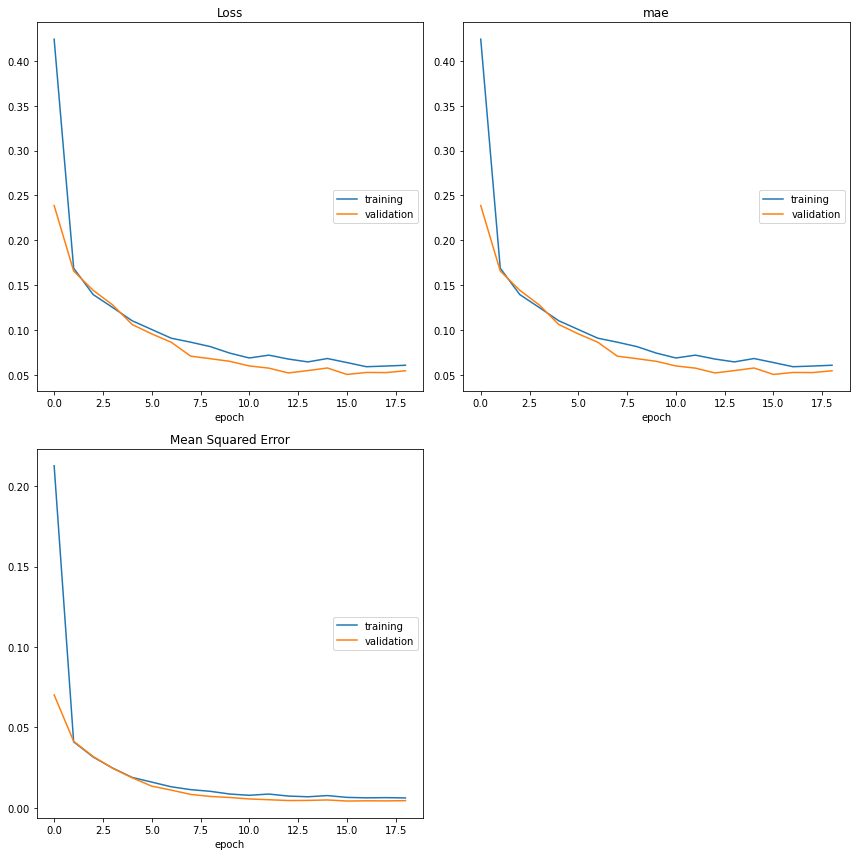

Loss
	training         	 (min:    0.059, max:    0.424, cur:    0.061)
	validation       	 (min:    0.050, max:    0.239, cur:    0.054)
mae
	training         	 (min:    0.059, max:    0.424, cur:    0.061)
	validation       	 (min:    0.050, max:    0.239, cur:    0.054)
Mean Squared Error
	training         	 (min:    0.006, max:    0.213, cur:    0.006)
	validation       	 (min:    0.004, max:    0.070, cur:    0.004)
11/11 [==============================] - 4s 378ms/step - loss: 0.0606 - mse: 0.0062 - mae: 0.0606 - val_loss: 0.0545 - val_mse: 0.0045 - val_mae: 0.0545
Epoch 19: early stopping


In [28]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_3aMAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_3aMAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_do_a = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_do_a = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_do_a = len(historia_fit.history['val_mse'])

#### Optimizador: SGD / Función de pérdida: MAE / 60 neuronas en tres capas ocultas / Dropout: 25% entre capas ocultas 1-2

In [29]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_3bMAE = Sequential()
n_neuronas = 60


# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_3bMAE.add(Dense(n_neuronas, input_shape=(dims,),activation='relu'))
model_3bMAE.add(Dense(n_neuronas,activation='relu'))
model_3bMAE.add(Dropout(0.25))
model_3bMAE.add(Dense(n_neuronas,activation='relu'))
model_3bMAE.add(Dense(n_neuronas,activation='relu'))
model_3bMAE.add(Dense(output_var))
model_3bMAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_3bMAE.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                480       
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 60)                3660      
                                                                 
 dense_4 (Dense)             (None, 1)                 61        
                                                                 
 activation (Activation)     (None, 1)                 0

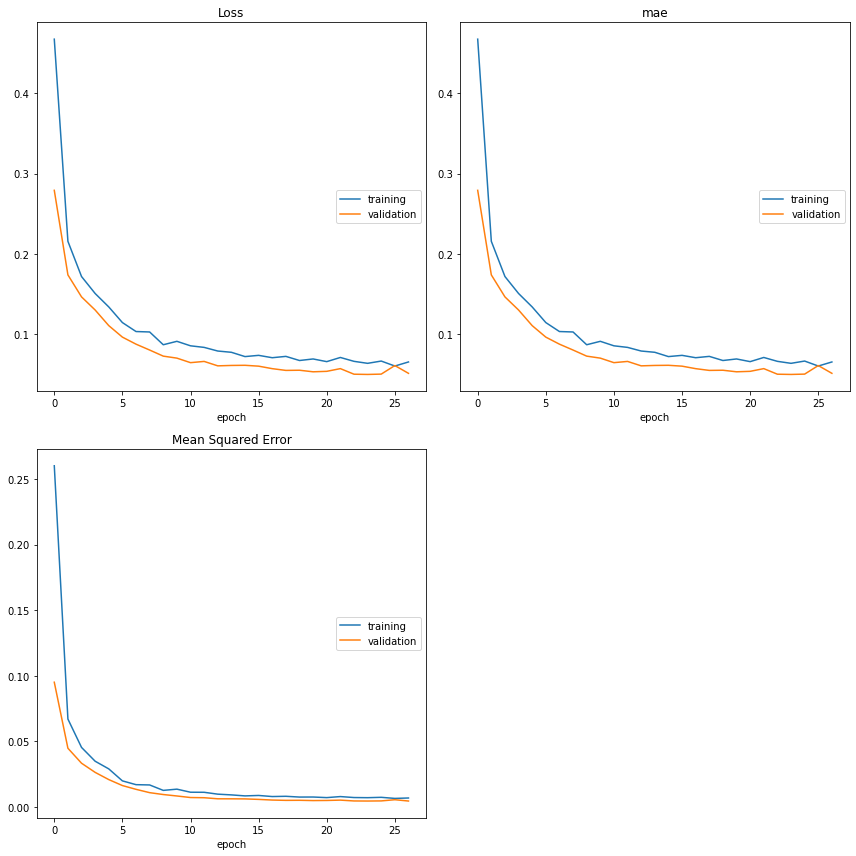

Loss
	training         	 (min:    0.060, max:    0.468, cur:    0.065)
	validation       	 (min:    0.050, max:    0.279, cur:    0.051)
mae
	training         	 (min:    0.060, max:    0.468, cur:    0.065)
	validation       	 (min:    0.050, max:    0.279, cur:    0.051)
Mean Squared Error
	training         	 (min:    0.006, max:    0.260, cur:    0.007)
	validation       	 (min:    0.004, max:    0.095, cur:    0.004)
11/11 [==============================] - 4s 361ms/step - loss: 0.0651 - mse: 0.0067 - mae: 0.0651 - val_loss: 0.0510 - val_mse: 0.0044 - val_mae: 0.0510
Epoch 27: early stopping


In [30]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_3bMAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_3bMAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_do_b = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_do_b = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_do_b = len(historia_fit.history['val_mse'])

#### Optimizador: SGD / Función de pérdida: MAE / 240 neuronas en tres capas ocultas / Dropout: 25%  entre capas ocultas 1-2 y 2-3

In [31]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_3cMAE = Sequential()
n_neuronas = 240

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_3cMAE.add(Dense(n_neuronas, input_shape=(dims,),activation='relu'))
model_3cMAE.add(Dense(n_neuronas,activation='relu'))
model_3cMAE.add(Dropout(0.25))
model_3cMAE.add(Dense(n_neuronas,activation='relu'))
model_3cMAE.add(Dropout(0.25))
model_3cMAE.add(Dense(n_neuronas,activation='relu'))
model_3cMAE.add(Dense(output_var))
model_3cMAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_3cMAE.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               1920      
                                                                 
 dense_1 (Dense)             (None, 240)               57840     
                                                                 
 dropout (Dropout)           (None, 240)               0         
                                                                 
 dense_2 (Dense)             (None, 240)               57840     
                                                                 
 dropout_1 (Dropout)         (None, 240)               0         
                                                                 
 dense_3 (Dense)             (None, 240)               57840     
                                                                 
 dense_4 (Dense)             (None, 1)                 2

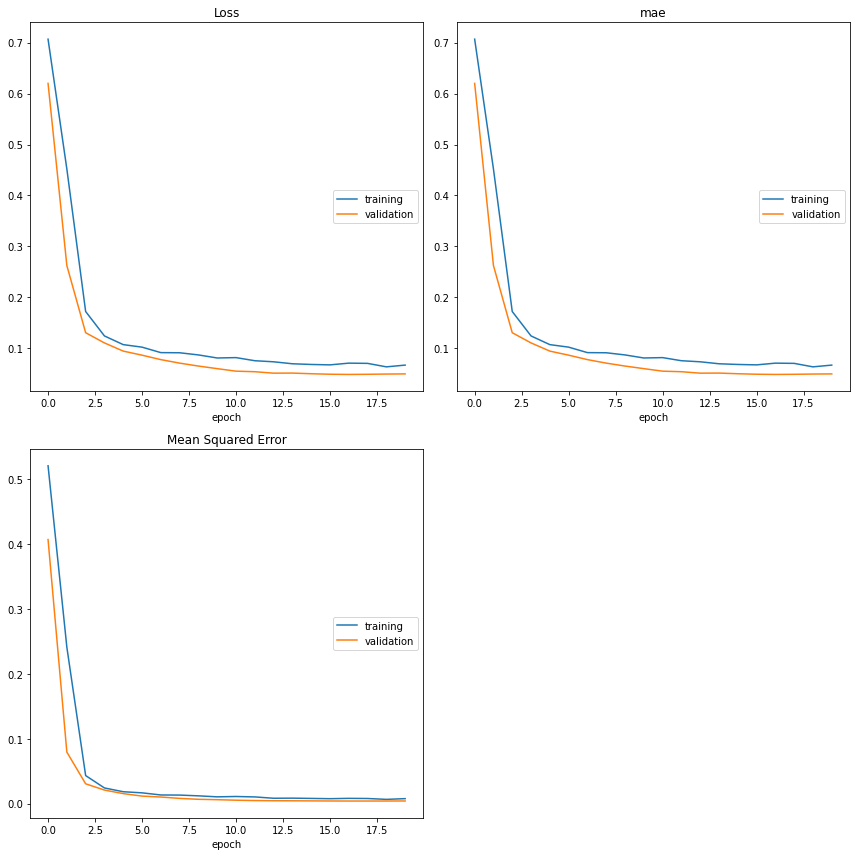

Loss
	training         	 (min:    0.063, max:    0.707, cur:    0.067)
	validation       	 (min:    0.048, max:    0.620, cur:    0.050)
mae
	training         	 (min:    0.063, max:    0.707, cur:    0.067)
	validation       	 (min:    0.048, max:    0.620, cur:    0.050)
Mean Squared Error
	training         	 (min:    0.007, max:    0.520, cur:    0.008)
	validation       	 (min:    0.004, max:    0.406, cur:    0.004)
11/11 [==============================] - 4s 355ms/step - loss: 0.0668 - mse: 0.0078 - mae: 0.0668 - val_loss: 0.0495 - val_mse: 0.0042 - val_mae: 0.0496
Epoch 20: early stopping


In [32]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_3cMAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_3cMAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_do_c = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_do_c = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_do_c = len(historia_fit.history['val_mse'])

#### Optimizador: SGD / Función de pérdida: MAE / 400 neuronas en tres capas ocultas / Dropout: 25% entre capas ocultas 1-2 y 2-3

In [33]:
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_3dMAE = Sequential()
n_neuronas = 400

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_3dMAE.add(Dense(n_neuronas, input_shape=(dims,),activation='relu'))
model_3dMAE.add(Dense(n_neuronas,activation='relu'))
model_3dMAE.add(Dropout(0.25))
model_3dMAE.add(Dense(n_neuronas,activation='relu'))
model_3dMAE.add(Dropout(0.25))
model_3dMAE.add(Dense(n_neuronas,activation='relu'))
model_3dMAE.add(Dense(output_var))
model_3dMAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_3dMAE.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               3200      
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 400)               160400    
                                                                 
 dense_4 (Dense)             (None, 1)                 4

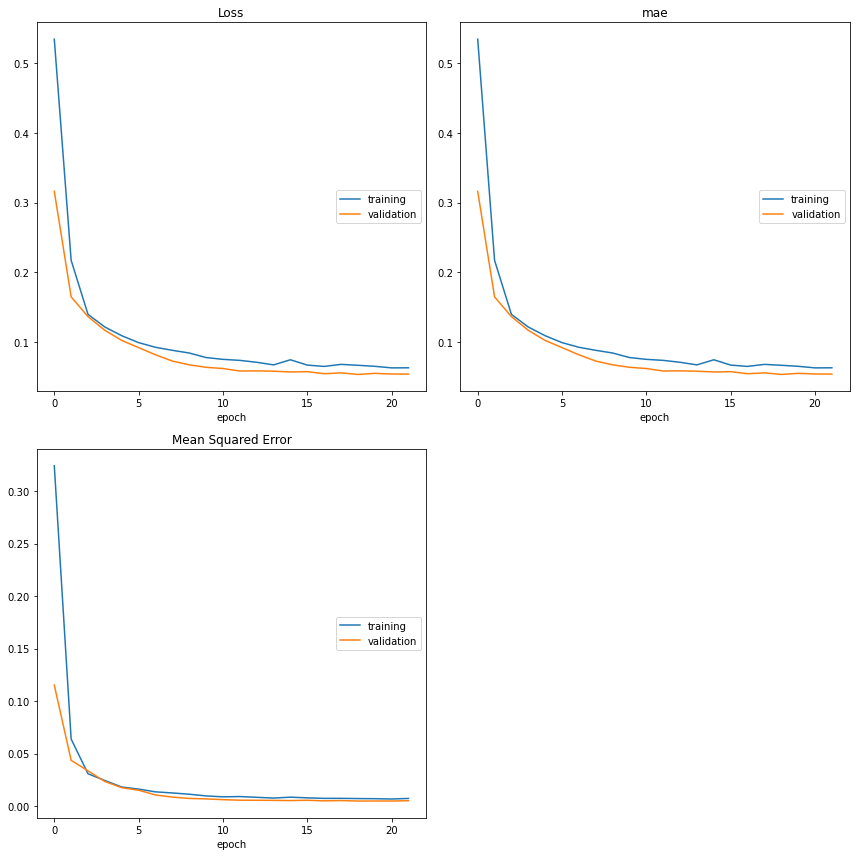

Loss
	training         	 (min:    0.062, max:    0.535, cur:    0.063)
	validation       	 (min:    0.053, max:    0.316, cur:    0.054)
mae
	training         	 (min:    0.062, max:    0.535, cur:    0.063)
	validation       	 (min:    0.053, max:    0.316, cur:    0.054)
Mean Squared Error
	training         	 (min:    0.007, max:    0.324, cur:    0.007)
	validation       	 (min:    0.005, max:    0.115, cur:    0.005)
11/11 [==============================] - 4s 348ms/step - loss: 0.0626 - mse: 0.0073 - mae: 0.0626 - val_loss: 0.0535 - val_mse: 0.0051 - val_mae: 0.0535
Epoch 22: early stopping


In [34]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_3dMAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1) 

# Entrenamiento de la red neuronal
historia_fit = model_3dMAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60, 
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_do_d = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_do_d = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_do_d = len(historia_fit.history['val_mse'])

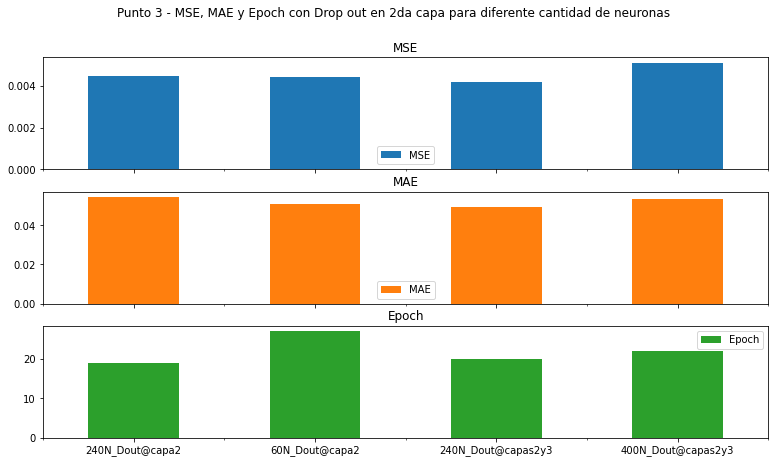

In [40]:
# Resultados Punto 3

Punto_3 = pd.DataFrame(data={'MSE': [MSE_sgd_mae_do_a, MSE_sgd_mae_do_b, MSE_sgd_mae_do_c, MSE_sgd_mae_do_d],
                             'MAE': [MAE_sgd_mae_do_a, MAE_sgd_mae_do_b, MAE_sgd_mae_do_c, MAE_sgd_mae_do_d],
                             'Epoch': [Epoch_sgd_mae_do_a, Epoch_sgd_mae_do_b, Epoch_sgd_mae_do_c, Epoch_sgd_mae_do_d]},
                             index=['240N_Dout@capa2','60N_Dout@capa2','240N_Dout@capas2y3', '400N_Dout@capas2y3'])

## Graficar resultados 
ax = Punto_3[['MSE','MAE', 'Epoch']].plot.bar(rot=0, subplots=True, figsize=(13,7),title="Punto 3 - MSE, MAE y Epoch con Drop out en 2da capa para diferente cantidad de neuronas")

Sobre el modelo obtenido en el Punto 2, se ingresan dos capas ocultas adicionales y se incluye la función _Drop out,_ con ajuste del 25%, en medio de las capas ocultas, esto con el objeto de observar cómo se comportan las métricas en el entrenamiento de la red neuronal. Para estas configuraciones, se calculan las métricas MSE y MAE con diferente cantidad de neuronas (240, 60 y 400) en las capas ocultas. Se obtuvo el menor valor de las métricas MSE y MAE en el modelo con 240 neuronas y _Drop out_ entre las capas ocultas 1-2 y 2-3.

También se observa que el _Drop out_ mejoró el desempeño de la red con 60 neuronas en las capas ocultas. Recordemos que en el Punto 2, el modelo con 60 tuvo los valores de MSE y MAE más grandes.

In [36]:
# Resultado Punto 3
Punto_3_MSE = MSE_sgd_mae_do_c
Punto_3_MAE = MAE_sgd_mae_do_c
Punto_3_Epoch = Epoch_sgd_mae_do_c

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

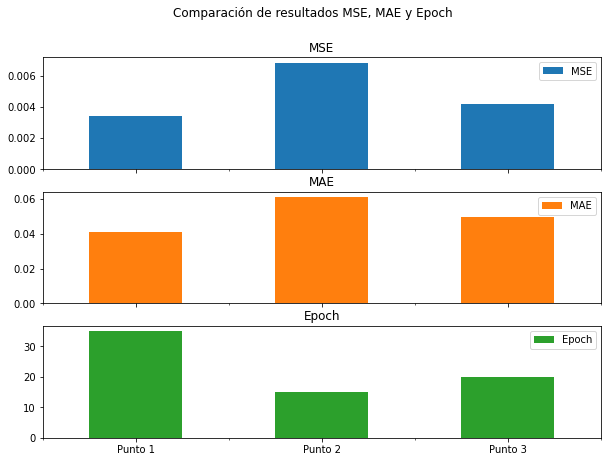

In [41]:
# Comparación de resultados

Resultados = pd.DataFrame(data={'MSE': [Punto_1_MSE, Punto_2_MSE, Punto_3_MSE],
                             'MAE': [Punto_1_MAE, Punto_2_MAE, Punto_3_MAE],
                             'Epoch': [Punto_1_Epoch, Punto_2_Epoch, Punto_3_Epoch]},
                             index=['Punto 1','Punto 2','Punto 3'])

## Graficar resultados 
ax = Resultados[['MSE','MAE', 'Epoch']].plot.bar(rot=0, subplots=True, figsize=(10,7),title="Comparación de resultados MSE, MAE y Epoch")


### Análisis y conclusiones

#### Modelo obtenido en el Punto 1: Optimizador: SGD, Función de pérdida: MAE, sin capas ocultas.

Algunas sugerencias para el análisis
- Ventajas: mejor MSE y MCA
- Desventajas: mayor número de iteraciones
- Es importante tener presente que el MSE en este punto dio tan peno por el overfiting que se genera al no tener regularizada las variables de entrada.

#### Modelo obtenido en el Punto 2: Optimizador: SGD, Función de pérdida: MAE, con 1 capa oculta de 240 neuronas.

Algunas sugerencias para el análisis:
- Ventajas:  menor número de iteraciones
- Desventajas: MSE y MCA más altos
- Es importante tener presente que el MSE en este punto dio tan peno por el overfiting que se genera al no tener regularizada las variables de entrada.

#### Modelo obtenido en el Punto 3: Optimizador: SGD, Función de pérdida: MAE, con 3 capas ocultas de 240 neuronas con Dropout entre las capas ocultas 1-2 y 2-3.

Algunas sugerencias para el análisis:
- Métricas MSE y MAE entre un poco mayores que el mejor valor (Punto 1) pero, utiliza _Drop out_ para evitar sobre ajueste.

#### Conclusiones

Algunas sugerencias para las conclusiones
- El modelo del punto 1 arrojó el mejor resultado (menor MSE y MAE). No tiene dropout para evitar sobre ajuste.

- Iniciar con modelos sencillos y luego evaluar posibles mejoras (modelos más complejos)

- Hay varios parámetros que se pueden calibrar: número de capas ocultas y cantidad de neuronas a utilizar, uso de _Drop out_ para reducir over fitting (ubicación y magnitud)

- El modelo del punto 3, tiene una inmensa diferencia con respecto a los modelos del punto 1 y 2, ya que se implementa Dropout, lo que previene el sobreajuste del modelo, tal como se ve en las 3 graficas. Las redes neuronales profundas con un gran número de parámetros son sistemas de aprendizaje automático muy potentes. Sin embargo, el sobreajuste es un problema grave en este tipo de redes. Además, las redes grandes son lentas, lo que dificulta el tratamiento del sobreajuste mediante la combinación de las predicciones de muchas redes neuronales grandes diferentes en el momento de la prueba. La técnica Dropout permite resolver este problema. La idea clave es eliminar aleatoriamente unidades (junto con sus conexiones) de la red neuronal durante el entrenamiento. Esto evita que las unidades se adapten demasiado.

- Epoch: un corte arbitrario, generalmente definido como "una pasada por todo el conjunto de datos", utilizado para separar el entrenamiento en fases distintas, lo cual es útil para el registro y la evaluación periódica. Cuando se utiliza validation_data o validation_split con el método de ajuste de los modelos Keras, la evaluación se ejecutará al final de cada época. Con el contexto anterior, y con el desarrollo de los puntos del 1 al 3, se deja en evidencia lo util e importante del valor de epoc, ya que permite encontrar valores de los parametros W que minimizan la funcion de costos.

- A pesar de lo resultados obtenidos en los 3 puntos, el punto 3, el resultado de este modelo, multicapa, es el modelo mas confiable, ya que tiene el menor sobreajuste, por lo que su performance a la hora de aplicarlo es mejor que los puntos 1 y 2
